<a href="https://colab.research.google.com/github/Tom-Lennox/Kaggle/blob/master/HousePrices_c01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# title

In [0]:
# kaggle APIセット
!pip install kaggle

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)
# 「Download 100%.」と表示で成功。

# [kaggle.json]を持参する。
from google.colab import drive
drive.mount('/content/drive')

# jsonファイルを指定の場所に配置
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

# リスト見たい場合
!kaggle datasets list

# train, test等ダウンロード
! kaggle competitions download house-prices-advanced-regression-techniques -p house-prices

# ダウンロードしたらここに入る大体。
!ls /content/house-prices

Download 100%.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, s

In [0]:
# jsonファイルを指定の場所に配置
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

# リスト見たい場合
# !kaggle datasets list

# train, test等ダウンロード
! kaggle competitions download house-prices-advanced-regression-techniques -p house-prices

# ダウンロードしたらここに入る大体。
!ls /content/house-prices

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt  sample_submission.csv  test.csv  train.csv


The size of train is : (1460, 82)
The size of test is : (1459, 82)
歪度: 1.882876
尖度: 6.536282


Text(0, 0.5, 'SalePrice')

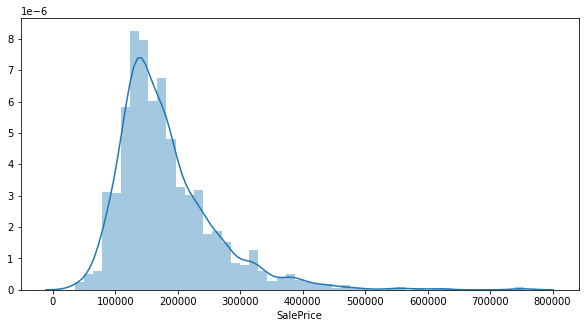

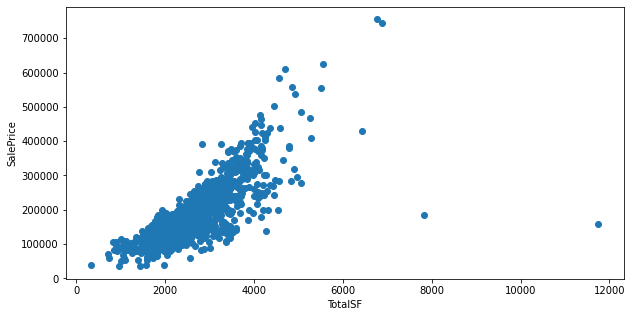

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# とりあえずファイルを読み込む
train = pd.read_csv("/content/house-prices/train.csv")
test = pd.read_csv("/content/house-prices/test.csv")

# 
# 配列の大きさを確認したい。
train['WhatIsData'] = 'Train'
test['WhatIsData'] = 'Test'
test['SalePrice'] = 9999999999
alldata = pd.concat([train,test],axis=0).reset_index(drop=True)
print('The size of train is : ' + str(train.shape))
print('The size of test is : ' + str(test.shape))
# 

train["SalePrice"].describe()
# mean, 50%等見て正規分布か確認。
# 下記で良いのでは？

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# .
# グラフ描画
plt.figure(figsize=(10,5))
sns.distplot(train['SalePrice'])
# 

# .
# 歪度と尖度を計算
print("歪度: %f" % train['SalePrice'].skew())
print("尖度: %f" % train['SalePrice'].kurt())
# 

test_x = pd.read_csv("/content/house-prices/test.csv")
#物件の広さを合計した変数を作成
train["TotalSF"] = train["1stFlrSF"] + train["2ndFlrSF"] + train["TotalBsmtSF"]
test_x["TotalSF"] = test_x["1stFlrSF"] + test_x["2ndFlrSF"] + test_x["TotalBsmtSF"]

# 散布図
# // なぜ散布図なのか？等の疑問を持つべき。
plt.figure(figsize=(10, 5))
plt.scatter(train["TotalSF"],train["SalePrice"])
plt.xlabel("TotalSF")
plt.ylabel("SalePrice")
# 

(array([0.00068493, 0.01643836, 0.02534247, 0.13767123, 0.19726027,
        0.19794521, 0.17123288, 0.11369863, 0.07191781, 0.03150685,
        0.01986301, 0.00753425, 0.00410959, 0.00136986, 0.        ,
        0.        , 0.00136986, 0.00068493, 0.        , 0.00068493,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00068493]),
 array([  334. ,   714.6,  1095.2,  1475.8,  1856.4,  2237. ,  2617.6,
         2998.2,  3378.8,  3759.4,  4140. ,  4520.6,  4901.2,  5281.8,
         5662.4,  6043. ,  6423.6,  6804.2,  7184.8,  7565.4,  7946. ,
         8326.6,  8707.2,  9087.8,  9468.4,  9849. , 10229.6, 10610.2,
        10990.8, 11371.4, 11752. ]),
 <a list of 30 Patch objects>)

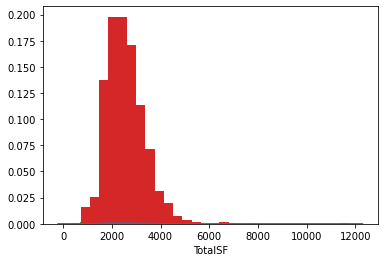

In [0]:
# グラフ
sns.distplot(train['TotalSF'])
train["SalePrice"]
data = train['TotalSF']
# 

# 【閑話】distplotで確率を求めたい場合（I mean デフォルトでy軸何表しているのかわからん。）
sns.distplot(data, kde=False, norm_hist=True, bins=100)

weights = np.ones_like(np.array(data))/float(len(np.array(data)))
plt.hist(data, weights=weights, bins = 100)

# l = [1, 3, 2, 1, 3]
l = data
weights = np.ones_like(np.array(l))/float(len(np.array(l)))
plt.hist(l, weights=weights, bins = 30)
# https://www.it-swarm.dev/ja/python/seaborn-distplotのy軸とは何ですか？/805905292/
# 

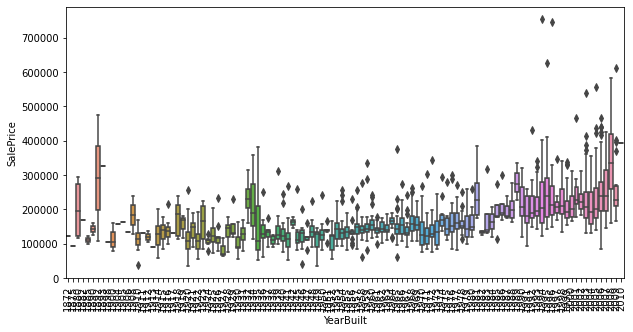

In [0]:
#築年数と物件価格の散布図を作成
# axis=1 ：横方向に連結
data = pd.concat([train["YearBuilt"],train["SalePrice"]],axis=1)
# 

# plt.figure(figsize=(20, 5))
plt.figure(figsize=(10, 5))
# xラベルを回転（どうせ見えないから不要だけど。）
plt.xticks(rotation='90')
sns.boxplot(x="YearBuilt",y="SalePrice",data=data)
# 

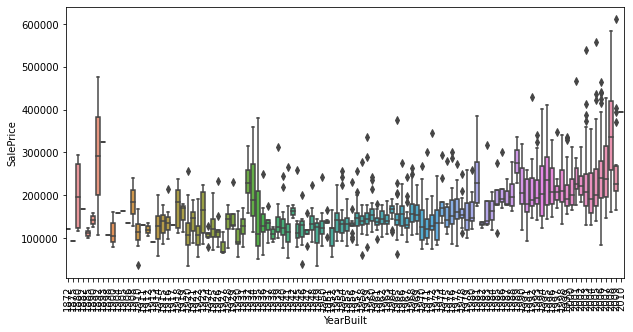

In [0]:
# 外れ値除去
train = train.drop(train[(train['YearBuilt']<2000) & (train['SalePrice']>600000)].index)

data = pd.concat([train["YearBuilt"],train["SalePrice"]],axis=1)

plt.figure(figsize=(10, 5))
plt.xticks(rotation='90')
sns.boxplot(x="YearBuilt",y="SalePrice",data=data)

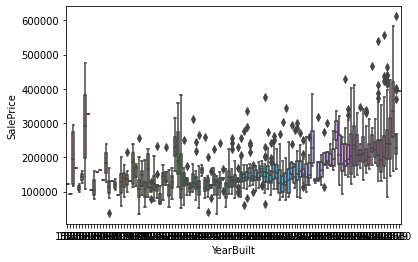

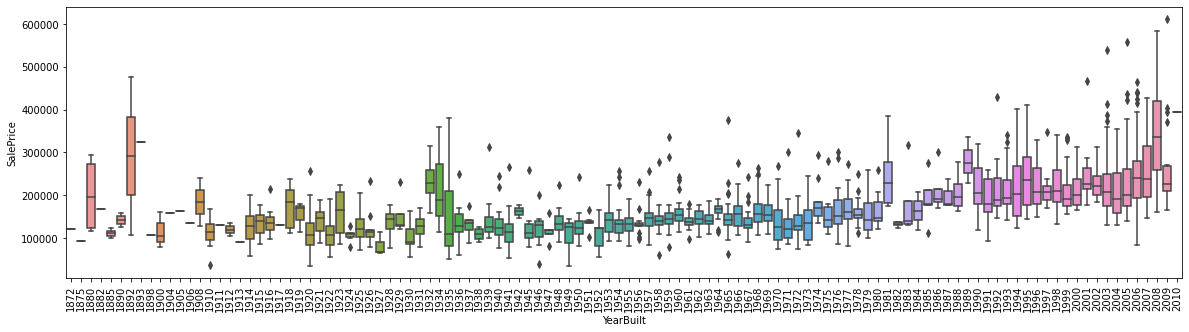

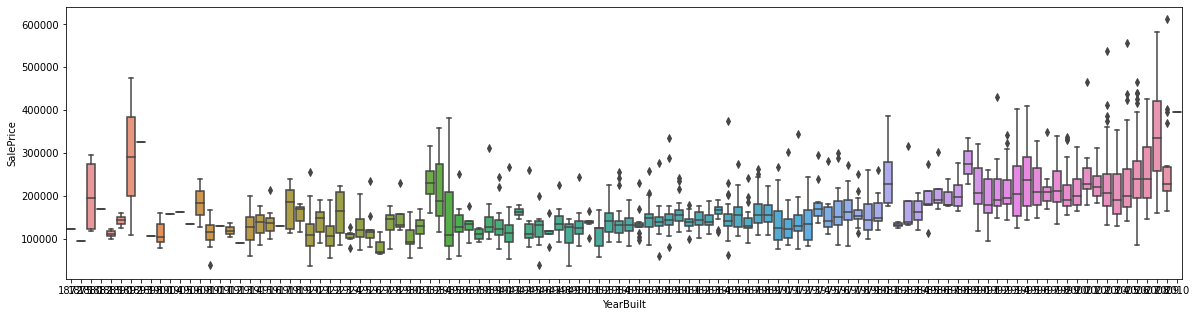

In [0]:
# ※差異確認には再度ファイル読み込み

data = pd.concat([train["YearBuilt"], train["SalePrice"]], axis=1)
# plt.figure
sns.boxplot(x="YearBuilt", y="SalePrice", data=data)

# 小さくて見えん
plt.figure(figsize=(20, 5))
# x軸が見えん
plt.xticks(rotation='90')
sns.boxplot(x="YearBuilt", y="SalePrice", data=data)

# 外れ値除去
train = train.drop(train[(train['YearBuilt']<2000) & (train['SalePrice']>600000)].index)
data = pd.concat([train["YearBuilt"],train["SalePrice"]],axis=1)
plt.figure(figsize=(20, 5))
sns.boxplot(x="YearBuilt", y="SalePrice", data=data)

In [0]:
# これの違い
# index、配列表示
print(train.index)
# index、2つ目を表示
print(train.index[1])
# ？index、２重配列の2つ目？
print(train.index[[1]])

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459],
           dtype='int64', length=1454)
1
Int64Index([1], dtype='int64')
ERROR! Session/line number was not unique in database. History logging moved to new session 59


Text(0, 0.5, 'SalePrice')

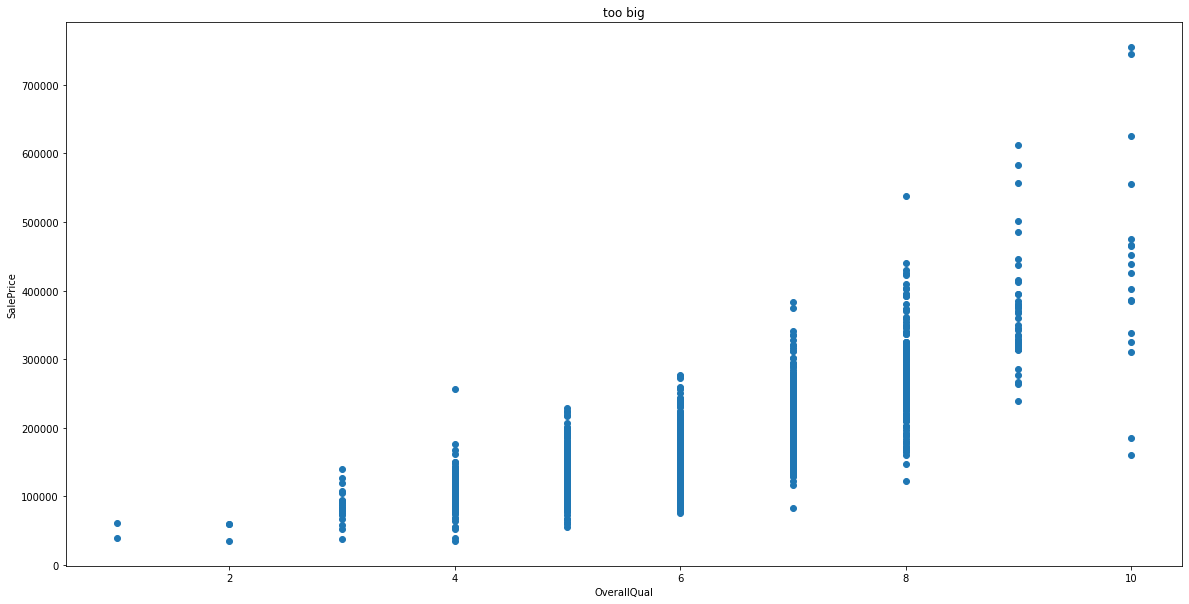

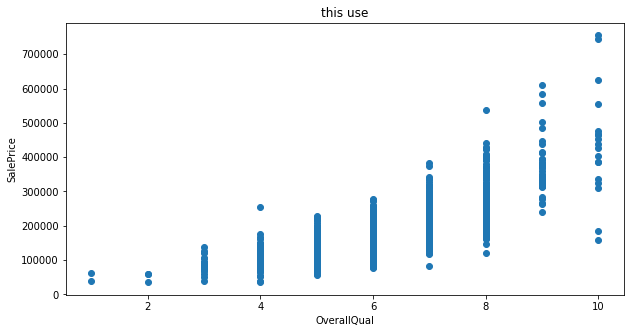

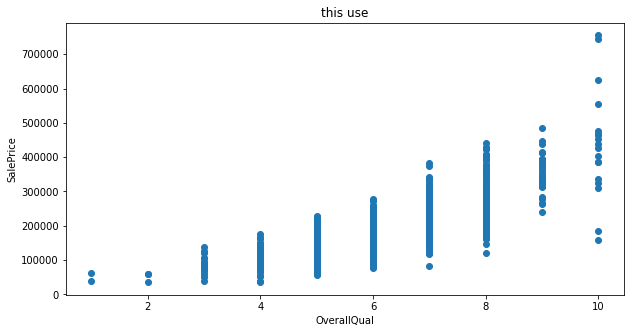

In [0]:
#家の材質・完成度と物件価格の散布図を作成
# 表示大きめ
plt.figure(figsize=(20, 10))
plt.scatter(train["OverallQual"], train["SalePrice"])
plt.title('too big')
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

# plt.title('表示、でかい ⇒ 小さく')
plt.figure(figsize=(10, 5))
plt.scatter(train["OverallQual"], train["SalePrice"])
plt.title('this use')
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

# print(train[""])
# 外れ値を除外する
# trainのA&B条件に該当するindexを削除
# 桁数間違えた。対策は？
# train = train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>20000)].index)

train = train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index)
train = train.drop(train[(train['OverallQual']<10) & (train['SalePrice']>500000)].index)

plt.figure(figsize=(10, 5))
plt.scatter(train["OverallQual"], train["SalePrice"])
plt.title('this use')
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

train_x: (1460, 82)
train_y: (1460,)
test_x: (1459, 81)
all_data: (2919, 82)
--
GarageArea      float64
TotalSF         float64
TotalBsmtSF     float64
BsmtFinSF1      float64
BsmtFinSF2      float64
GarageYrBlt     float64
BsmtFullBath    float64
BsmtHalfBath    float64
GarageCars      float64
BsmtUnfSF       float64
MasVnrArea      float64
LotFrontage     float64
GarageType       object
KitchenQual      object
MiscFeature      object
MasVnrType       object
PoolQC           object
SaleType         object
MSZoning         object
GarageQual       object
Alley            object
GarageCond       object
Utilities        object
Functional       object
FireplaceQu      object
Fence            object
Exterior2nd      object
Exterior1st      object
Electrical       object
BsmtQual         object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
GarageFinish     object
WhatIsData       object
dtype: object
0
1
2
3
4
5
6
7
8
9
Alley
BsmtCond
BsmtExp

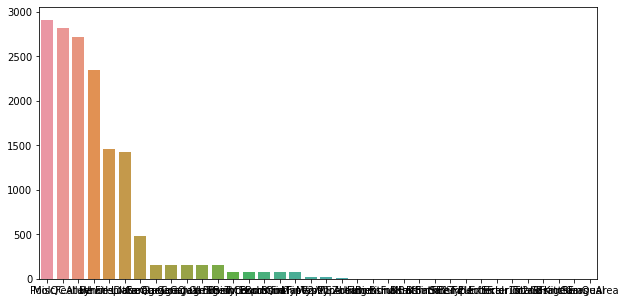

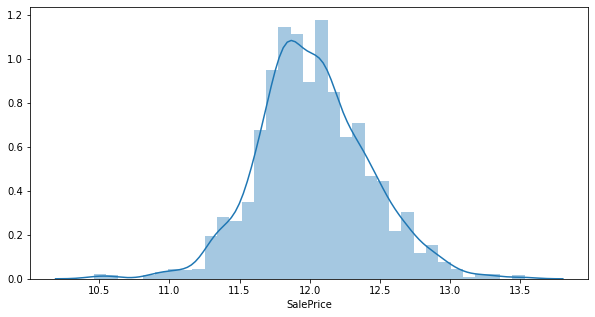

In [25]:
train_x = train.drop("SalePrice",axis=1)

# print(train_x)
# train_y = train["SalePrice"]
# print(train_y)

#学習データとテストデータを統合
# testには　["SalePrice"]　無いから気にするな。
all_data = pd.concat([train_x,test_x],axis=0,sort=True)
# all_data

# 長さ確認、一応
# print(len(np.array(train_x)) + len(np.array(test_x)))
# print(len(np.array(all_data)))

# IDのカラムは不要。別の変数に格納 ⇒ drop
train_ID = train['Id']
test_ID = test_x['Id']
# print(test_ID)
# print(test_ID)

# print(train['Id'])
# all_data.drop("Id", axis = 1, inplace = True)
train_y = train["SalePrice"]

#それぞれのデータのサイズを確認
print("train_x: "+str(train_x.shape))
print("train_y: "+str(train_y.shape))
print("test_x: "+str(test_x.shape))
print("all_data: "+str(all_data.shape))

# 欠損値の確認
all_data_na = all_data.isnull()
all_data_na = all_data.isnull().sum()
all_data_na = all_data.isnull().sum()[all_data.isnull().sum() > 0]
all_data_na = all_data.isnull().sum()[all_data.isnull().sum() > 0].sort_values(ascending=False)
# print(all_data_na)
# グラフ化
plt.figure(figsize=(10, 5))
sns.barplot(x=all_data_na.index, y=all_data_na)
# 欠損値があるカラムをリスト化
na_col_list = all_data.isnull().sum()[all_data.isnull().sum()>0].index.tolist()
#欠損があるカラムのデータ型を確認
print("--")
print(all_data[na_col_list].dtypes.sort_values())
# 。

# ⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘
# --
# ■pandas　groupbyの内容確認
# 'Neighborhood'、'LotFrontage'は相関性があると想定
# all_data['Neighborhood']
kari = all_data.groupby('Neighborhood')['LotFrontage'].mean()
kari
# 。
# 接道（LotFrontage）の補完
# median()　：　中央値
all_data['LorFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# ■python for
check = all_data.isnull().sum()[all_data.isnull().sum()>0].index.tolist()
for i in range(10):
    print(i)
for i in check:
    print(i)

# 「
# fill check（適当
print("--")
def checkColName(colname):
  if colname == "LorFrontage":
    return colname
  else:
    return "o"

for ans in map(checkColName, check):
  print(ans)
# 」
# --

# ⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘⌘

# float, obj　の欠損値リスト作成 ⇒ 埋め。

## 「欠損値が存在するかつfloat型のリストを作成
# all_dataから欠損値含むカラムだけ抽出
na_col_list = all_data.isnull().sum()[all_data.isnull().sum()>0].index.tolist()
print(all_data[na_col_list])
# ＋　型
print("--")
print(all_data[na_col_list].dtypes)
# ＋　∩　型 = float64
print("--")
print(all_data[na_col_list].dtypes[all_data[na_col_list].dtypes == "float64"])
# ＋　∩　index + listに。
print("--")
print(all_data[na_col_list].dtypes[all_data[na_col_list].dtypes == "float64"].index.tolist())

float_list = all_data[na_col_list].dtypes[all_data[na_col_list].dtypes == "float64"].index.tolist()
# 」

# 「欠損値が存在するかつobject型のリストを作成
# obj_list = all_data[na_col_list].dtypes[all_data[na_col_list].dtypes == "object"].index.tolist()
# 道筋：「配列のdtypes=objのもの」の配列
# print(all_data[na_col_list].dtypes)
print("--")
print(all_data[na_col_list].dtypes[all_data[na_col_list].dtypes == "object"].index.tolist())
obj_list = all_data[na_col_list].dtypes[all_data[na_col_list].dtypes == "object"].index.tolist()
# 」

# 「float欠 ⇒ 0に。
# やること ⇒ float64のカラムの na を 0 に。
# ｜【具体】float64の配列を取得 ⇒ all_data[ここに入れる。]  ⇒ fillna(0) で補完。
print("==")
# この1行、配列？
all_data[na_col_list].dtypes == "float64"
# 下記で取得できるから。
# all_data[na_col_list].dtypes[　【　all_data[na_col_list].dtypes == "float64"　】　]
float_list = all_data[na_col_list].dtypes[all_data[na_col_list].dtypes == "float64"].index.tolist()
all_data[float_list] = all_data[float_list].fillna(0)
# 再代入、float無いこと、確認
na_col_list = all_data.isnull().sum()[all_data.isnull().sum()>0].index.tolist()
print(all_data[na_col_list].dtypes)
# 」

# 完成したら統合
# 「
# obj null  ⇒ 0
print("==")
all_data[na_col_list].dtypes == "object"
obj_list = all_data[na_col_list].dtypes[all_data[na_col_list].dtypes == "object"].index.tolist()
all_data[obj_list] = all_data[obj_list].fillna("None")
all_data.isnull().sum()[all_data.isnull().sum() > 0]
# 」

# ▼
# カテゴリ変数に変換する
# 下記3件は数値の大小が関係ない。
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
# ▲

# 「
# 目的変数、対数変換
# sns.distplot(train['SalePrice'])
# train_y = np.log1p(train_y)
# sns.distplot(np.log(train['SalePrice']))
# 
# 
plt.figure(figsize=(10,5))
# ▼これを
# sns.distplot(train_y)
# ▼正規分布にしたい。
sns.distplot(np.log1p(train_y))
# 」

Index(['GarageYrBlt', 'KitchenAbvGr', 'HalfBath', 'EnclosedPorch',
       'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF',
       '3SsnPorch', 'PoolArea'],
      dtype='object')
-4.131023389965558
-16.676677212569206
-0.768827839691194
-0.4319524860153069
-0.36730456086322183
-0.3100519016165532
-0.2525381361380527
-0.19125037136030493
-0.11787159579315364
-0.11330625195211651
-0.06688425148748102


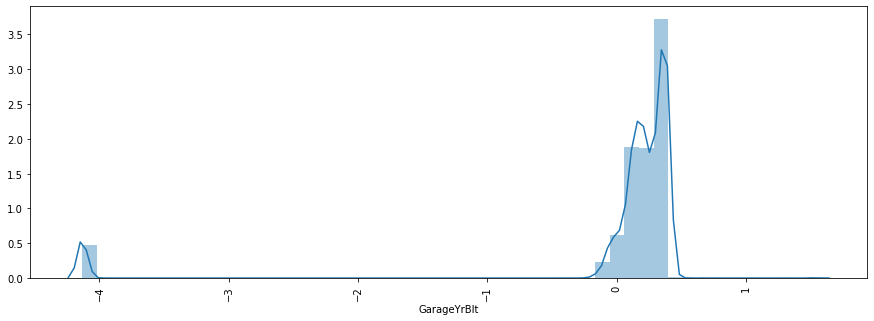

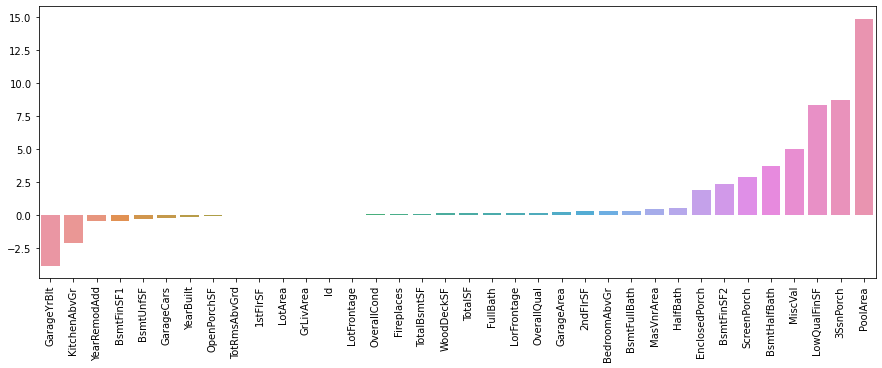

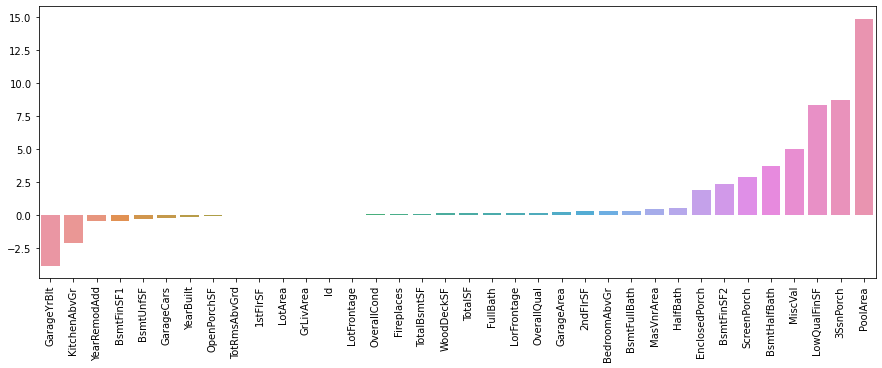

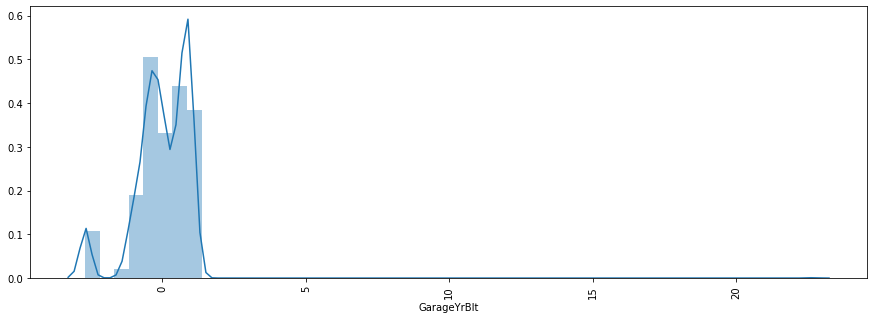

In [27]:
plt.figure(figsize=(15,5))
plt.xticks(rotation='90')
sns.distplot(all_data['GarageYrBlt'])
# 「
# 説明変数を対数変換
# 歪度の高いものを対数変換とかして正規分布にしていく作業。

# 説明変数、カラム
num_feats = all_data.dtypes[all_data.dtypes != "object"].index
# num_feats
# print(all_data.skew())
# print(all_data[num_feats].apply(lambda x: x.skew()))
# all_data[num_feats].apply(lambda x: x.skew())

# lambda：【lambda 引数:処理内容】
skewed_feats = all_data[num_feats].apply(lambda x: x.skew()).sort_values()
# print(skewed_feats)
plt.figure(figsize=(15,5))
plt.xticks(rotation='90')
# 何を表示したいのか想像 ⇒ かく。
sns.barplot(x=skewed_feats.index, y=skewed_feats)

# # とりあえず描画するか。
# # 意味不明なことをした。
# k_MiscVal = all_data["MiscVal"].sort_values()
# plt.figure(figsize=(15,5))
# plt.xticks(rotation='90')
# sns.barplot(x=k_MiscVal.index, y=k_MiscVal)
# # .
# plt.figure(figsize=(15,5))
# sns.distplot(all_data["BsmtHalfBath"])
# skewed_feats_over = skewed_feats[abs(skewed_feats)]

# > .5
# print(abs(skewed_feats)) 
# print(skewed_feats[abs(skewed_feats) > 0.5])
print(skewed_feats[abs(skewed_feats) > 0.5].index)
skewed_feats_over = skewed_feats[abs(skewed_feats) > 0.5].index

for i in skewed_feats_over:
  print(min(all_data[i]))
# 0を含む ⇒ Yeo-Johnson変換
# PowerTransformerの引数standardizeの規定値はTrueであるので、平均0、標準偏差1になるように正規化されている。
pt = PowerTransformer()
pt.fit(all_data[skewed_feats_over])

#変換後のデータで各列を置換
all_data[skewed_feats_over] = pt.transform(all_data[skewed_feats_over])
plt.figure(figsize=(15,5))
plt.xticks(rotation='90')
# 何を表示したいのか想像 ⇒ かく。
sns.barplot(x=skewed_feats.index, y=skewed_feats)

plt.figure(figsize=(15,5))
plt.xticks(rotation='90')
sns.distplot(all_data['GarageYrBlt'])

# sns.distplot(train['SalePrice'])
# train_y = np.log1p(train_y)
# sns.distplot(np.log(train['SalePrice']))
# 」